In [2]:
!unzip '/content/happy vs not happy.zip'

Archive:  /content/happy vs not happy.zip
   creating: happy vs not happy/testing/
  inflating: happy vs not happy/testing/Screenshot 2023-08-06 203528.png  
  inflating: happy vs not happy/testing/Screenshot 2023-08-06 205611.png  
  inflating: happy vs not happy/testing/Screenshot 2023-08-06 205638.png  
   creating: happy vs not happy/training/
   creating: happy vs not happy/training/happy/
  inflating: happy vs not happy/training/happy/1.png  
  inflating: happy vs not happy/training/happy/10.png  
  inflating: happy vs not happy/training/happy/11.png  
  inflating: happy vs not happy/training/happy/12.png  
  inflating: happy vs not happy/training/happy/13.png  
  inflating: happy vs not happy/training/happy/14.png  
  inflating: happy vs not happy/training/happy/2.png  
  inflating: happy vs not happy/training/happy/3.png  
  inflating: happy vs not happy/training/happy/4.png  
  inflating: happy vs not happy/training/happy/5.png  
  inflating: happy vs not happy/training/happy/

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

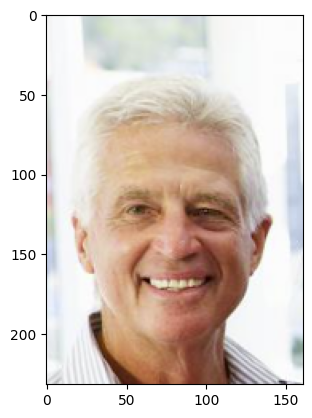

In [4]:
img = image.load_img('/content/happy vs not happy/training/happy/3.png')
plt.imshow(img)
plt.show()

In [5]:
cv2.imread('/content/happy vs not happy/training/happy/3.png').shape

(232, 161, 3)

In [13]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [14]:
train_ds = train.flow_from_directory('/content/happy vs not happy/training/',
                                  target_size=(250,250),
                                  batch_size=3,
                                  class_mode='binary')

val_ds = validation.flow_from_directory('/content/happy vs not happy/validation/',
                                  target_size=(250,250),
                                  batch_size=3,
                                  class_mode='binary')

Found 28 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [15]:
train_ds.class_indices

{'Not Happy': 0, 'happy': 1}

In [16]:
train_ds.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(250, 250, 3)),
    MaxPool2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer= Adam(lr=0.001), metrics=['accuracy'])

In [18]:
model.fit(train_ds, steps_per_epoch=3, epochs=100, validation_data=val_ds)

Epoch 1/100
3/3 [==============================] - 4s 267ms/step - loss: 6.7676 - accuracy: 0.4444 - val_loss: 4.3946 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 71ms/step - loss: 3.3757 - accuracy: 0.4444 - val_loss: 0.8412 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 103ms/step - loss: 0.8702 - accuracy: 0.2222 - val_loss: 0.6660 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 101ms/step - loss: 0.6294 - accuracy: 0.7778 - val_loss: 0.7074 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 97ms/step - loss: 0.7173 - accuracy: 0.4444 - val_loss: 0.6674 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 68ms/step - loss: 0.6309 - accuracy: 0.8889 - val_loss: 0.6440 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 67ms/step - loss: 0.5903 - accuracy: 0.5556 - val_loss: 0.6122 - val_accuracy: 0.6000
Epoch 8/100
3/3 [

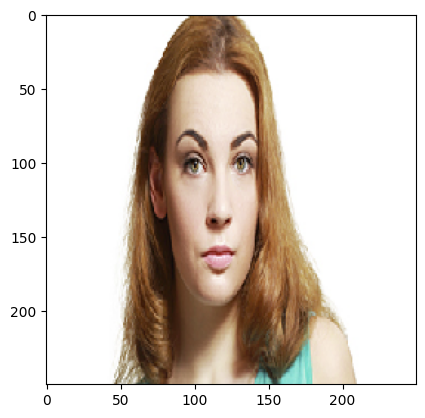

1/1 [==============================] - 0s 99ms/step
Not Happy!


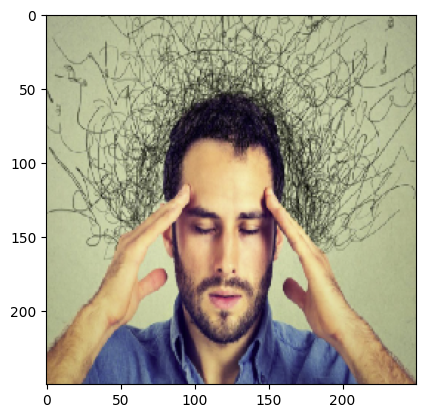

1/1 [==============================] - 0s 25ms/step
Not Happy!


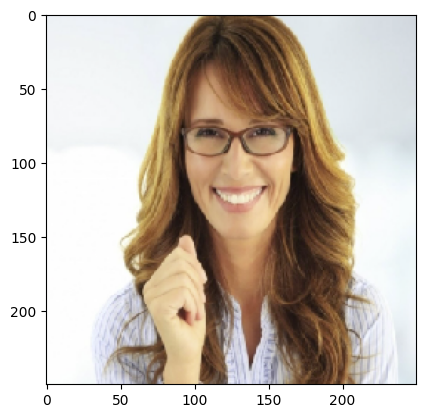

1/1 [==============================] - 0s 20ms/step
Happy!


In [19]:
dir_path = '/content/happy vs not happy/testing'

for i in os.listdir(dir_path):
    img = image.load_img(os.path.join(dir_path, i), target_size=(250, 250))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)  # Expand dimensions ONCE

    val = model.predict(X)

    if val == 0:
        print('Not Happy!')
    else:
        print('Happy!')